In [16]:
# Poisson problem on a unit square with Dirichlet boundary conditions
# Manufactured solution.

import numpy as np
import eztfem as ezt
from func import func
from scipy.sparse.linalg import spsolve

In [17]:
# create mesh
mesh = ezt.quadrilateral2d([20, 20], 'quad9')

rectangle_quad9


In [18]:
# define the problem
elementdof = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [2, 2, 2, 2, 2, 2, 2, 2, 2 ]], dtype=int).transpose()
problem = ezt.Problem(mesh, elementdof, nphysq=1)

In [19]:
# user struct for setting problem coefficients, ...
user = ezt.User()
user.coorsys = 0
user.alpha = 1
user.funcnr = 4
user.func = func

In [20]:
# define Gauss integration and basis functions
shape = 'quad'
user.xr, user.wg = ezt.gauss_legendre(shape, n=3)
user.phi, user.dphi = ezt.basis_function(shape, 'Q2', user.xr)

In [21]:
# assemble the system matrix and vector
A, f = ezt.build_system(mesh, problem, ezt.poisson_elem, user)

In [22]:
# define essential boundary conditions (Dirichlet)
iess = ezt.define_essential(mesh, problem, 'curves', [0, 1, 2, 3])

# fill values for the essential boundary conditions
uess = ezt.fill_system_vector(mesh, problem, 'curves', [0, 1, 2, 3], func,
                                funcnr=3)

# apply essential boundary conditions to the system
ezt.apply_essential(A, f, uess, iess)

In [23]:
# solve the system
u = spsolve(A.tocsr(), f)

In [24]:
# compare with exact solution
print('Difference with exact solution:')
uex = ezt.fill_system_vector(mesh, problem, 'nodes',
                                np.arange(mesh.nnodes), func, funcnr=3)

maxdiff = max(abs(u-uex))
print(maxdiff)

Difference with exact solution:
4.071378136849546e-07


In [25]:
# gradient (dudx,dudy) of the solution
xr = ezt.refcoor_nodal_points(mesh)
[user.phi, user.dphi] = ezt.basis_function('quad', 'Q2', xr)
user.u = u

gradu = ezt.deriv_vector(mesh, problem, ezt.poisson_deriv, user)

In [26]:
mesh_pv = ezt.generate_pyvista_mesh(mesh)
ezt.plot_mesh_pv(mesh_pv, show_edges=True, window_size=(800, 400))

Widget(value='<iframe src="http://localhost:54478/index.html?ui=P_0x30ff64560_2&reconnect=auto" class="pyvista…

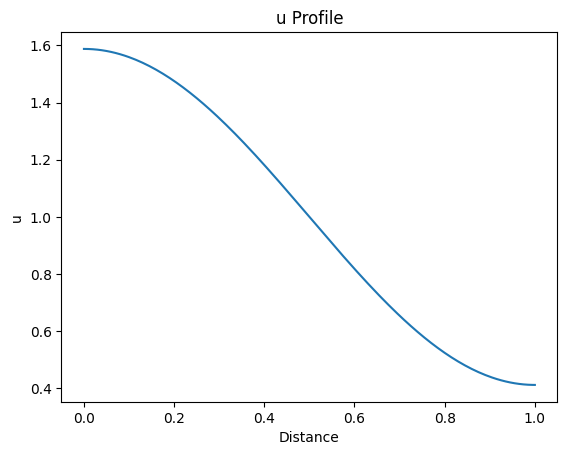

In [27]:
points = [[0.0, 0.3, 0.0], [1.0, 0.3, 0.0]]
data_sample = ezt.plot_sol_over_line(mesh_pv, problem, u, points, npoints=200) #, plot_mesh=True)


In [28]:
ezt.plot_sol(mesh_pv, problem, u, show_scalar_bar=True, n_colors=16,
             window_size=(800, 400))

Widget(value='<iframe src="http://localhost:54478/index.html?ui=P_0x30fc57bc0_3&reconnect=auto" class="pyvista…

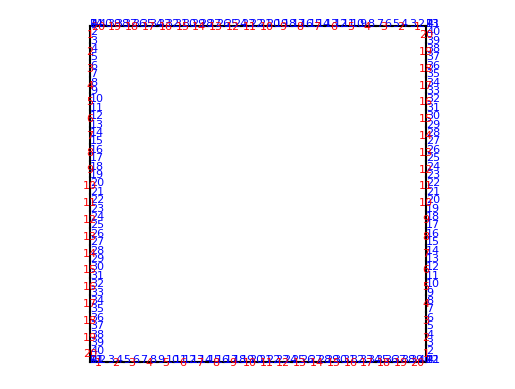

In [29]:
ezt.plot_curves(mesh, nodenumbers=1, pointnumbers=1, elementnumbers=1)

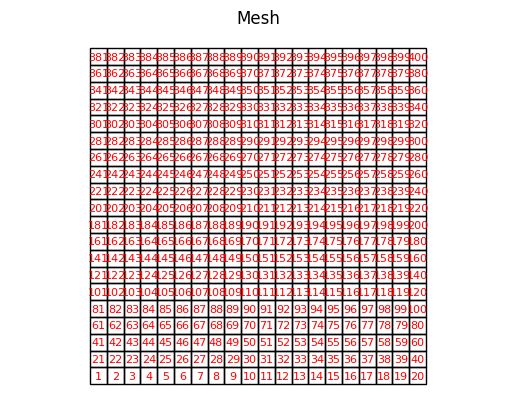

In [30]:
ezt.plot_mesh(mesh, nodemarks=0, nodenumbers=0, elementnumbers=1)